In [1]:
import pandas as pd

from sklearn.model_selection import cross_validate
import numpy as np
import os

import sklearn.metrics as metrics

from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.kernel_approximation import Nystroem
from sklearn.preprocessing import StandardScaler

from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
df_sample = pd.read_csv("data/sample.csv")

df_train_feats = pd.read_csv("data/train_features.csv")
df_train_labels = pd.read_csv("data/train_labels.csv")
df_test_feats = pd.read_csv("data/test_features.csv")

df_labels_cols = list(df_train_labels)

active_feats = [
 'Age',
 'EtCO2',
 'PTT',
 'BUN',
 'Lactate',
 'Temp',
 'Hgb',
 'HCO3',
 'BaseExcess',
 'RRate',
 'Fibrinogen',
 'Phosphate',
 'WBC',
 'Creatinine',
 'PaCO2',
 'AST',
 'FiO2',
 'Platelets',
 'SaO2',
 'Glucose',
 'ABPm',
 'Magnesium',
 'Potassium',
 'ABPd',
 'Calcium',
 'Alkalinephos',
 'SpO2',
 'Bilirubin_direct',
 'Chloride',
 'Hct',
 'Heartrate',
 'Bilirubin_total',
 'TroponinI',
 'ABPs',
 'pH']

subtask3_feats = [
 'RRate',
 'ABPm',
 'SpO2',
 'Heartrate']

subtask1_labels = [
 'LABEL_BaseExcess',
 'LABEL_Fibrinogen',
 'LABEL_AST',
 'LABEL_Alkalinephos',
 'LABEL_Bilirubin_total',
 'LABEL_Lactate',
 'LABEL_TroponinI',
 'LABEL_SaO2',
 'LABEL_Bilirubin_direct',
 'LABEL_EtCO2'
        ]

subtask2_labels = [
 'LABEL_Sepsis'
 ]

subtask3_labels = [
 'LABEL_RRate',
 'LABEL_ABPm',
 'LABEL_SpO2',
 'LABEL_Heartrate'
        ]


def feats_2_X1(df_feats,feats_list):
    #Subtask1
    n_derived_feats = 4

    #pids = np.unique(df_train_feats['pid'].values)
    pids = pd.unique(df_feats['pid'])
    n_patients = len(pids)
    #df_train_feats2 = pd.DataFrame(data={'pid':pids})

    print(n_patients)
    print(n_derived_feats*len(feats_list))
    X = np.nan*np.ones((n_patients,n_derived_feats*len(feats_list)))

    patient_df_sizes = np.zeros(n_patients)
    for i in range(0,n_patients):
        patient_df = df_feats[df_feats['pid']==pids[i]]
        patient_df_sizes[i] = patient_df.shape[0]
        for j in range(0,len(feats_list)):
            patient_feat = patient_df[feats_list[j]].values
            patient_feat = patient_feat[~np.isnan(patient_feat)]
            #print(len(patient_feat))
            j0 = j*n_derived_feats
            
            if len(patient_feat)>0:
                X[i][j0+0] = np.mean(patient_feat)
                X[i][j0+1] = np.std(patient_feat)
                X[i][j0+2] = np.min(patient_feat)
                X[i][j0+3] = np.max(patient_feat)
        #print(patient_df)
        if i%500==0:
            print(i)
    print(np.max(patient_df_sizes))
    return(X)

def feats_2_X2(df_feats,feats_list):
    #Subtask1
    #n_derived_feats = 4
    n_derived_feats = 1

    #pids = np.unique(df_train_feats['pid'].values)
    pids = pd.unique(df_feats['pid'])
    n_patients = len(pids)
    #df_train_feats2 = pd.DataFrame(data={'pid':pids})

    print(n_patients)
    print(n_derived_feats*len(feats_list))
    X = np.nan*np.ones((n_patients,n_derived_feats*len(feats_list)))

    patient_df_sizes = np.zeros(n_patients)
    for i in range(0,n_patients):
        patient_df = df_feats[df_feats['pid']==pids[i]]
        patient_df_sizes[i] = patient_df.shape[0]
        for j in range(0,len(feats_list)):
            patient_feat = patient_df[feats_list[j]].values
            patient_feat = patient_feat[~np.isnan(patient_feat)]
            #print(len(patient_feat))
            j0 = j*n_derived_feats
            
            if len(patient_feat)>0:
                X[i][j0+0] = np.mean(patient_feat)
                #X[i][j0+1] = np.std(patient_feat)
                #X[i][j0+2] = np.min(patient_feat)
                #X[i][j0+3] = np.max(patient_feat)
        #print(patient_df)
        if i%500==0:
            print(i)
    print(np.max(patient_df_sizes))
    return(X)

#print(df_train_feats.describe())
#a = df_train_feats[df_train_feats['Time']>24]
#print(a.shape)

#print(np.mean(a[~np.isnan(a)]))

def feats_2_X3(df_feats,feats_list):
    #Subtask1
    n_derived_feats = 4

    #pids = np.unique(df_train_feats['pid'].values)
    pids = pd.unique(df_feats['pid'])
    n_patients = len(pids)
    #df_train_feats2 = pd.DataFrame(data={'pid':pids})

    print(n_patients)
    print(n_derived_feats*len(feats_list))
    X = np.nan*np.ones((n_patients,n_derived_feats*len(feats_list)))

    patient_df_sizes = np.zeros(n_patients)
    for i in range(0,n_patients):
        patient_df = df_feats[df_feats['pid']==pids[i]]
        patient_df_sizes[i] = patient_df.shape[0]
        for j in range(0,len(feats_list)):
            patient_feat = patient_df[feats_list[j]].values
            nan_mask = np.isnan(patient_feat)
            times = (patient_df['Time'].values)[~nan_mask]
            patient_feat = patient_feat[~nan_mask]
            #print(len(patient_feat))
            j0 = j*n_derived_feats
            
            if len(patient_feat)>0:
                X[i][j0+0] = np.mean(patient_feat)
            if len(patient_feat)>1:
                X[i][j0+1] = patient_feat[-1]
                X[i][j0+2] = (patient_feat[-1]-patient_feat[0])/(times[-1]-times[0])
            if len(patient_feat)>2:
                grad_end = (patient_feat[-1]-patient_feat[-2])/(times[-1]-times[-2])
                X[i][j0+3] = grad_end
        #print(patient_df)
        if i%500==0:
            print(i)
    print(np.max(patient_df_sizes))
    return(X)


In [3]:
def standardize(X_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return(X_train,X_test)
    

def impute(X_train,X_test):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(X_train)
    
    X_train = imp_mean.transform(X_train)
    X_test = imp_mean.transform(X_test)

    #print(X_train_imp)
    return(X_train,X_test)

def forest_fi(X_train,y_train,X_test):

    forest = ExtraTreesClassifier(n_estimators=20,
                                  random_state=0)

    forest.fit(X_train,y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    for f in range(X_train.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    X_train = X_train[:,indices[:50]]
    X_test = X_test[:,indices[:50]]
    return(X_train,X_test)


def nystroem(X_train,X_test):
    gamma=1.0
    n_components=100
    print("nystroem gamma=%f"%(gamma))
    print("nystroem q=%d"%(n_components))
    feature_map_nystroem = Nystroem(gamma=gamma,
                                    random_state=42,
                                    n_components=n_components)
    feature_map_nystroem.fit(X_train)
    Q_train = feature_map_nystroem.transform(X_train)
    sqrt_k_inv_train = np.linalg.inv(feature_map_nystroem.normalization_)
    B_train = np.dot(Q_train,sqrt_k_inv_train)
    K_train = np.dot(B_train,np.transpose(B_train))

    Q_test = feature_map_nystroem.transform(X_test)
    sqrt_k_inv_test = np.linalg.inv(feature_map_nystroem.normalization_)
    B_test = np.dot(Q_test,sqrt_k_inv_test)
    K_test = np.dot(B_test,np.transpose(B_train))
    return(K_train,K_test)


In [4]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

def fit_model1_1(X_train,y_train):
    print(np.shape(y_train))
    print(np.sum(y_train))
    clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, 
                                     max_depth=3, random_state=42).fit(X_train,y_train)
    #clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
    #                                 max_depth=5, random_state=42).fit(X_train_imp,y_train)

    return(clf)

def fit_model1_2(X_train,y_train):
    print(np.shape(y_train))
    print(np.sum(y_train))
    
    clf = svm.SVC(C=10,
                  class_weight="balanced",
                  decision_function_shape='ovo').fit(X_train,y_train)
    return(clf)

def fit_model1(X_train,y_train,clf_init,sw_dict={}):
    n = np.shape(y_train)[0]
    w0 = n/(n-np.sum(y_train))
    w1 = n/np.sum(y_train)
    
    sample_weight = np.zeros(len(y_train))
    if not(sw_dict):
        print("using default sample weights")
        sample_weight[y_train == 0] = w0
        sample_weight[y_train == 1] = w1
    else:
        print("using custom sample weights")
        sample_weight[y_train == 0] = sw_dict[0]
        sample_weight[y_train == 1] = sw_dict[1]
    
    print("Shape and sum of y_train")
    print(np.shape(y_train))
    print(np.sum(y_train))
    clf = clf_init
    #clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, 
    #                                 max_depth=3, random_state=42)
    clf.fit(X_train,y_train,sample_weight=sample_weight)
    #clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
    #                                 max_depth=5, random_state=42).fit(X_train_imp,y_train)

    return(clf)



def fit_model2(K_train,y_train):
    C = 1.0
    class_weight={1:17.5}
    print("Shape and sum of y_train")
    print(np.shape(y_train))
    print(np.sum(y_train))
    
    clf = svm.SVC(C=C,
                  kernel="precomputed",
                  class_weight="balanced",
                  decision_function_shape='ovo',
                  verbose=True).fit(K_train,y_train)
    print("C: %f"%C)
    print("Computed class weight: %s"%(str(clf.class_weight_)))
    return(clf)


def fit_model3(X_train,y_train):
    #print(np.shape(y_train))
    #print(np.sum(y_train))
    reg = GradientBoostingRegressor(random_state=42).fit(X_train,y_train)

    return(reg)

In [5]:
test_pids = pd.unique(df_test_feats['pid'])

df_test_labels = pd.DataFrame(columns=df_labels_cols)
df_test_labels['pid'] = test_pids

In [6]:
X_train1_raw = feats_2_X1(df_train_feats,active_feats)
X_test1_raw = feats_2_X1(df_test_feats,active_feats)

print(np.shape(X_train1_raw))
print(np.shape(X_test1_raw))
X_train,X_test = impute(X_train1_raw,X_test1_raw)
print(np.shape(X_train))
print(np.shape(X_test))

18995
140
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
12.0
12664
140
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
12.0
(18995, 140)
(12664, 140)
(18995, 140)
(12664, 140)


In [7]:
count = 0
for i in range(np.shape(X_train1_raw)[1]):
    a = np.count_nonzero(~np.isnan(X_train1_raw[:,i]))
    print(a)
    if a>0:
        count+=1

print(count)

18995
18995
18995
18995
1322
1322
1322
1322
7816
7816
7816
7816
13966
13966
13966
13966
4872
4872
4872
4872
18552
18552
18552
18552
13975
13975
13975
13975
7837
7837
7837
7837
5697
5697
5697
5697
18843
18843
18843
18843
1714
1714
1714
1714
9329
9329
9329
9329
13341
13341
13341
13341
13727
13727
13727
13727
7772
7772
7772
7772
4796
4796
4796
4796
7678
7678
7678
7678
13541
13541
13541
13541
5055
5055
5055
5055
16330
16330
16330
16330
18888
18888
18888
18888
12326
12326
12326
12326
14997
14997
14997
14997
15113
15113
15113
15113
12266
12266
12266
12266
4744
4744
4744
4744
18973
18973
18973
18973
623
623
623
623
8351
8351
8351
8351
14639
14639
14639
14639
18988
18988
18988
18988
4711
4711
4711
4711
2792
2792
2792
2792
18597
18597
18597
18597
7994
7994
7994
7994
140


In [8]:
for i in range(0,len(subtask1_labels)):
#for i in range(0,1):
    print("i=%d"%i)
    y_train=df_train_labels[subtask1_labels[i]].values
    n = float(np.shape(y_train)[0])
    
    #sample weight
    use_custom_sw = False
    if use_custom_sw:
        #sample weight
        n = float(np.shape(y_train)[0])
        w1_boost = 10.0

        w0 = n/(n-np.sum(y_train))
        w1 = (n/np.sum(y_train))*w1_boost
        geo_mean = np.sqrt(w0*w1)
        w0 /= geo_mean
        w1 /= geo_mean
    else:
        w0=1.0
        w1=1.0
    
    clf_init = HistGradientBoostingClassifier(random_state=42)
    clf = fit_model1(X_train,y_train,clf_init,sw_dict={0:w0,1:w1})
    score = clf.score(X_train,y_train)
    
    cv_results = cross_validate(clf,X_train,y_train,cv=5,
            scoring=["roc_auc","accuracy","recall","precision"])
    
    print("train score= %f"%score)
    print("cv roc auc= %f"%np.mean(cv_results['test_roc_auc']))
    print("cv acc= %f"%np.mean(cv_results['test_accuracy']))
    print("cv rec= %f"%np.mean(cv_results['test_recall']))
    print("cv prec= %f"%np.mean(cv_results['test_precision']))
    
    #print(sigmoid(clf.decision_function(X_train)))
    #p_train=clf.predict(X_train)
    
    print("y train:")
    print("n pos %f"%np.sum(y_train))
    print("frac pos %f"%(np.sum(y_train)/n))
    
    print("y train pred:")
    y_train_pred=clf.predict(X_train)
    print("n pos %f"%np.sum(y_train_pred))
    print("frac pos %f"%(np.sum(y_train_pred)/n) ) 
    
    p_train=clf.predict_proba(X_train)
    print("prob sum 0 %f"%np.sum(p_train[:,0]))
    print("prob sum 1 %f"%np.sum(p_train[:,1]))
    
    #print(p_train)
    
    print("y test:")
    p_test=clf.predict_proba(X_test)
    print("prob sum 0 %f"%np.sum(p_test[:,0]))
    print("prob sum 1 %f"%np.sum(p_test[:,1]))
    
    print("\n\n")
    
    #y_test[:,1+i] = p_test[:,1]
    
    df_test_labels[subtask1_labels[i]] = p_test[:,1]

i=0
using custom sample weights
Shape and sum of y_train
(18995,)
5096.0
train score= 0.919137
cv roc auc= 0.928645
cv acc= 0.876599
cv rec= 0.756671
cv prec= 0.777560
y train:
n pos 5096.000000
frac pos 0.268281
y train pred:
n pos 4894.000000
frac pos 0.257647
prob sum 0 13901.346882
prob sum 1 5093.653118
y test:
prob sum 0 9262.081306
prob sum 1 3401.918694



i=1
using custom sample weights
Shape and sum of y_train
(18995,)
1400.0
train score= 0.956568
cv roc auc= 0.799989
cv acc= 0.936510
cv rec= 0.252143
cv prec= 0.694805
y train:
n pos 1400.000000
frac pos 0.073704
y train pred:
n pos 623.000000
frac pos 0.032798
prob sum 0 17593.553715
prob sum 1 1401.446285
y test:
prob sum 0 11808.218180
prob sum 1 855.781820



i=2
using custom sample weights
Shape and sum of y_train
(18995,)
4554.0
train score= 0.839431
cv roc auc= 0.746393
cv acc= 0.791261
cv rec= 0.240665
cv prec= 0.685834
y train:
n pos 4554.000000
frac pos 0.239747
y train pred:
n pos 1890.000000
frac pos 0.099500
prob

In [92]:


#hp_x = np.array([1,2,3,4,5,6,7,8,16])
#hp_x = np.array([1,2,3,4,5,6,7,8,16])
hp_x = [0]
metrics = ['test_roc_auc',
           'test_accuracy',
           'test_recall',
           'test_precision'
          ]
hp_y = np.zeros((len(hp_x),len(metrics)))

i=9
for j in range(0,len(hp_x)):
    print("i=%d"%i)
    y_train=df_train_labels[subtask1_labels[i]].values

    use_custom_sw = False
    
    if use_custom_sw:
        #sample weight
        n = float(np.shape(y_train)[0])
        w1_boost = 10.0

        w0 = n/(n-np.sum(y_train))
        w1 = (n/np.sum(y_train))*w1_boost
        geo_mean = np.sqrt(w0*w1)
        w0 /= geo_mean
        w1 /= geo_mean
    else:
        w0=1.0
        w1=1.0
    
    
    #clf_init = GradientBoostingClassifier(n_estimators=hp_x[j], learning_rate=1.0, 
    #                                 max_depth=3, random_state=42)
    clf_init = HistGradientBoostingClassifier(random_state=42)
    clf = fit_model1(X_train,y_train,clf_init,sw_dict={0:w0,1:w1})
    
    score = clf.score(X_train,y_train)
    
    cv_results = cross_validate(clf,X_train,y_train,cv=5,
            scoring=["roc_auc","accuracy","recall","precision"])
    
    print("train score= %f"%score)
    print("cv roc auc= %f"%np.mean(cv_results['test_roc_auc']))
    print("cv acc= %f"%np.mean(cv_results['test_accuracy']))
    print("cv rec= %f"%np.mean(cv_results['test_recall']))
    print("cv prec= %f"%np.mean(cv_results['test_precision']))
    
    for k in range(0,len(metrics)):
        hp_y[j][k] = np.mean(cv_results[metrics[k]])
        
    
    #print(sigmoid(clf.decision_function(X_train)))
    #p_train=clf.predict(X_train)
    
    print("y train:")
    print("n pos %f"%np.sum(y_train))
    print("frac pos %f"%(np.sum(y_train)/n))
    
    print("y train pred:")
    y_train_pred=clf.predict(X_train)
    print("n pos %f"%np.sum(y_train_pred))
    print("frac pos %f"%(np.sum(y_train_pred)/n) ) 
    
    p_train=clf.predict_proba(X_train)
    print("prob sum 0 %f"%np.sum(p_train[:,0]))
    print("prob sum 1 %f"%np.sum(p_train[:,1]))
    
    #print(p_train)
    
    print("y test:")
    p_test=clf.predict_proba(X_test)
    print("prob sum 0 %f"%np.sum(p_test[:,0]))
    print("prob sum 1 %f"%np.sum(p_test[:,1]))
    
    print("\n\n")
    
    #y_test[:,1+i] = p_test[:,1]
    
    df_test_labels[subtask1_labels[i]] = p_test[:,1]



i=9
using custom sample weights
Shape and sum of y_train
(18995,)
1254.0
train score= 0.983627
cv roc auc= 0.934273
cv acc= 0.963359
cv rec= 0.580586
cv prec= 0.810752
y train:
n pos 1254.000000
frac pos 0.066017
y train pred:
n pos 993.000000
frac pos 0.052277
prob sum 0 17747.732897
prob sum 1 1247.267103
y test:
prob sum 0 11882.576354
prob sum 1 781.423646





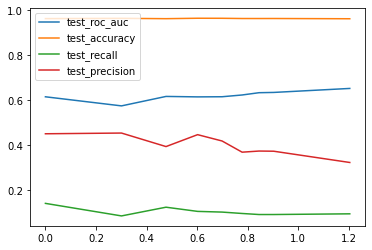

In [89]:
f1 = plt.figure()
ax1 = f1.add_subplot(111)
for k in range(0,len(metrics)):
    ax1.plot(np.log10(hp_x),hp_y[:,k],label=metrics[k])
ax1.legend()
plt.show()

In [9]:
df_test_labels

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,0,0.922230,0.564706,0.876636,0.942709,0.818287,0.413834,0.004664,0.327305,0.073881,0.006220,NaN,NaN,NaN,NaN,NaN
1,10001,0.029884,0.024146,0.339080,0.279901,0.251734,0.052736,0.087575,0.050337,0.053138,0.014200,NaN,NaN,NaN,NaN,NaN
2,10003,0.015405,0.024254,0.212800,0.161865,0.170520,0.227277,0.025159,0.216313,0.018399,0.010059,NaN,NaN,NaN,NaN,NaN
3,10004,0.019618,0.087000,0.316502,0.334136,0.290121,0.071723,0.041944,0.087275,0.010719,0.022491,NaN,NaN,NaN,NaN,NaN
4,10005,0.100838,0.041141,0.153471,0.117237,0.125790,0.085006,0.006810,0.045313,0.010978,0.001147,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12659,9989,0.493078,0.021283,0.195267,0.134382,0.133590,0.344067,0.003779,0.147624,0.006330,0.001229,NaN,NaN,NaN,NaN,NaN
12660,9991,0.240444,0.112526,0.143815,0.165256,0.186950,0.257387,0.020217,0.221607,0.012400,0.010231,NaN,NaN,NaN,NaN,NaN
12661,9992,0.699523,0.027226,0.079635,0.046210,0.054838,0.172692,0.006970,0.684390,0.010117,0.001838,NaN,NaN,NaN,NaN,NaN
12662,9994,0.990294,0.592081,0.848351,0.924976,0.927498,0.877358,0.030560,0.865731,0.269929,0.006093,NaN,NaN,NaN,NaN,NaN


In [10]:
X_train2_raw = feats_2_X2(df_train_feats,active_feats)
X_test2_raw = feats_2_X2(df_test_feats,active_feats)




18995
140
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
12.0
12664
140
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
12.0


In [25]:
print(np.shape(X_train2_raw))
print(np.shape(X_test2_raw))

X_train,X_test = impute(X_train2_raw,X_test2_raw)
print(np.shape(X_train))
print(np.shape(X_test))

#X_train,X_test = standardize(X_train,X_test)
#print(np.shape(X_train))
#print(np.shape(X_test))


#X_train,X_test = nystroem(X_train,X_test)
#print(np.shape(X_train))
#print(np.shape(X_test))

(18995, 140)
(12664, 140)
(18995, 35)
(12664, 35)


In [31]:
y_train=df_train_labels[subtask2_labels[0]].values

X_train,X_test = forest_fi(X_train,y_train,X_test)
print(np.shape(X_train))
print(np.shape(X_test))

1. feature 36 (0.013107)
2. feature 38 (0.012164)
3. feature 37 (0.011283)
4. feature 20 (0.011242)
5. feature 82 (0.010902)
6. feature 39 (0.010877)
7. feature 81 (0.010720)
8. feature 122 (0.010658)
9. feature 105 (0.010565)
10. feature 104 (0.010515)
11. feature 21 (0.010502)
12. feature 120 (0.010440)
13. feature 133 (0.010368)
14. feature 121 (0.010107)
15. feature 83 (0.010041)
16. feature 135 (0.010013)
17. feature 93 (0.009698)
18. feature 2 (0.009675)
19. feature 94 (0.009641)
20. feature 106 (0.009594)
21. feature 78 (0.009561)
22. feature 80 (0.009519)
23. feature 23 (0.009426)
24. feature 76 (0.009424)
25. feature 8 (0.009352)
26. feature 95 (0.009322)
27. feature 132 (0.009313)
28. feature 134 (0.009184)
29. feature 123 (0.009163)
30. feature 0 (0.009141)
31. feature 92 (0.009024)
32. feature 3 (0.008970)
33. feature 22 (0.008880)
34. feature 91 (0.008879)
35. feature 88 (0.008861)
36. feature 79 (0.008787)
37. feature 90 (0.008767)
38. feature 67 (0.008571)
39. feature 96

In [34]:

def fit_model2_1(X_train,y_train,hps):
    C = hps["C"]
    #class_weight={1:16.5}
    class_weight={1:hps["w1"]}
    print("Shape and sum of y_train")
    print(np.shape(y_train))
    print(np.sum(y_train))
    
    clf = svm.SVC(C=hps["C"],
                  kernel="rbf",
                  gamma=hps["gamma"],
                  class_weight=class_weight,
                  decision_function_shape='ovo',
                  verbose=True).fit(X_train,y_train)
    print("C: %f"%hps["C"])
    print("gamma: %f"%hps["gamma"])
    print("Computed class weight: %s"%(str(clf.class_weight_)))
    return(clf)

for i in range(0,len(subtask2_labels)):
#for i in range(0,1):
    y_train=df_train_labels[subtask2_labels[i]].values
    
    #X_train,X_test = forest_fi(X_train,y_train,X_test)
    #print(np.shape(X_train))
    #print(np.shape(X_test))
    
    hps = {"C":0.01,"w1":16.5}
    clf = fit_model2_1(X_train,y_train,hps)
    
    score = clf.score(X_train,y_train)
    cv_results = cross_validate(clf,X_train,y_train,cv=5,
            scoring=["roc_auc","accuracy","recall","precision"])
    
    print("train score= %f"%score)
    print("cv roc auc= %f"%np.mean(cv_results['test_roc_auc']))
    print("cv acc= %f"%np.mean(cv_results['test_accuracy']))
    print("cv rec= %f"%np.mean(cv_results['test_recall']))
    print("cv prec= %f"%np.mean(cv_results['test_precision']))
    
    p_train_pred = sigmoid(clf.decision_function(X_train))
    print(p_train_pred)
    y_train_pred=clf.predict(X_train)
    print(y_train_pred)

    p_test = sigmoid(clf.decision_function(X_test))
    print(p_test)
    y_test=clf.predict(X_test)
    print(y_test)    
    
    
    df_test_labels[subtask2_labels[i]] = p_test

Shape and sum of y_train
(18995,)
1088.0
[LibSVM]C: 0.020000
Computed class weight: [ 1.  16.5]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]train score= 0.903238
cv roc auc= 0.614251
cv roc acc= 0.889866
cv roc rec= 0.158990
cv roc prec= 0.128391
[0.49164373 0.32760594 0.45562297 ... 0.39078787 0.38425937 0.3171537 ]
[0. 0. 0. ... 0. 0. 0.]
[0.26747633 0.35315686 0.36767042 ... 0.38633546 0.41357981 0.39068914]
[0. 0. 0. ... 0. 0. 0.]


In [26]:
for i in range(0,len(subtask2_labels)):
#for i in range(0,1):
    print("i=%d"%i)
    y_train=df_train_labels[subtask2_labels[i]].values
    n = float(np.shape(y_train)[0])
    
    #sample weight
    use_custom_sw = False
    if use_custom_sw:
        #sample weight
        n = float(np.shape(y_train)[0])
        w1_boost = 10.0

        w0 = n/(n-np.sum(y_train))
        w1 = (n/np.sum(y_train))*w1_boost
        geo_mean = np.sqrt(w0*w1)
        w0 /= geo_mean
        w1 /= geo_mean
    else:
        w0=1.0
        w1=1.0
    
    clf_init = HistGradientBoostingClassifier(random_state=42)
    clf = fit_model1(X_train,y_train,clf_init,sw_dict={0:w0,1:w1})
    score = clf.score(X_train,y_train)
    
    cv_results = cross_validate(clf,X_train,y_train,cv=5,
            scoring=["roc_auc","accuracy","recall","precision"])
    
    print("train score= %f"%score)
    print("cv roc auc= %f"%np.mean(cv_results['test_roc_auc']))
    print("cv acc= %f"%np.mean(cv_results['test_accuracy']))
    print("cv rec= %f"%np.mean(cv_results['test_recall']))
    print("cv prec= %f"%np.mean(cv_results['test_precision']))
    
    #print(sigmoid(clf.decision_function(X_train)))
    #p_train=clf.predict(X_train)
    
    print("y train:")
    print("n pos %f"%np.sum(y_train))
    print("frac pos %f"%(np.sum(y_train)/n))
    
    print("y train pred:")
    y_train_pred=clf.predict(X_train)
    print("n pos %f"%np.sum(y_train_pred))
    print("frac pos %f"%(np.sum(y_train_pred)/n) ) 
    
    p_train=clf.predict_proba(X_train)
    print("prob sum 0 %f"%np.sum(p_train[:,0]))
    print("prob sum 1 %f"%np.sum(p_train[:,1]))
    
    #print(p_train)
    
    print("y test:")
    p_test=clf.predict_proba(X_test)
    print("prob sum 0 %f"%np.sum(p_test[:,0]))
    print("prob sum 1 %f"%np.sum(p_test[:,1]))
    
    print("\n\n")
    
    #y_test[:,1+i] = p_test[:,1]
    
    df_test_labels[subtask2_labels[i]] = p_test[:,1]

i=0
using custom sample weights
Shape and sum of y_train
(18995,)
1088.0
train score= 0.947355
cv roc auc= 0.713952
cv acc= 0.942459
cv rec= 0.005509
cv prec= 0.306667
y train:
n pos 1088.000000
frac pos 0.057278
y train pred:
n pos 90.000000
frac pos 0.004738
prob sum 0 17905.767893
prob sum 1 1089.232107
y test:
prob sum 0 11965.876904
prob sum 1 698.123096





In [24]:
p_test

array([[0.9149813 , 0.0850187 ],
       [0.9754607 , 0.0245393 ],
       [0.95058718, 0.04941282],
       ...,
       [0.95687934, 0.04312066],
       [0.87758738, 0.12241262],
       [0.8645211 , 0.1354789 ]])

In [13]:
cv_results

{'fit_time': array([0.54553485, 0.50528193, 0.3668673 , 0.43168187, 0.30331087]),
 'score_time': array([0.0098021 , 0.01191616, 0.00901985, 0.00987816, 0.009166  ]),
 'test_roc_auc': array([0.69340494, 0.71512066, 0.7203135 , 0.73855581, 0.70236454]),
 'test_accuracy': array([0.94261648, 0.94261648, 0.94261648, 0.9418268 , 0.94261648]),
 'test_recall': array([0.00460829, 0.        , 0.00458716, 0.00458716, 0.01376147]),
 'test_precision': array([0.33333333, 0.        , 0.5       , 0.2       , 0.5       ])}

In [27]:
df_test_labels['LABEL_Sepsis'].mean

<bound method Series.mean of 0        0.085019
1        0.024539
2        0.049413
3        0.028747
4        0.030725
           ...   
12659    0.025250
12660    0.149124
12661    0.043121
12662    0.122413
12663    0.135479
Name: LABEL_Sepsis, Length: 12664, dtype: float64>

In [15]:
print(y_train[:100])
print(y_train_pred[:100])
print(p_train_pred[:100])

print(len(y_train_pred))
print(np.sum(y_train))
print(np.sum(p_train_pred))
print(np.sum(y_train_pred))

print(len(y_test))
print(np.sum(p_test))
print(np.sum(y_test))


print(np.max(p_train_pred))
print(np.max(p_test))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


NameError: name 'p_train_pred' is not defined

In [40]:
a = np.sum(y_train_pred*y_train)
b = np.sum(y_train)
c = np.sum(y_train_pred)
print(a)
print(b)
print(c)
print(a/b)

394.0
1088.0
1538.0
0.36213235294117646


In [16]:
print(list(df_test_labels))
print(df_test_labels['LABEL_Sepsis'])

['pid', 'LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2', 'LABEL_Sepsis', 'LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']
0        0.666441
1        0.281373
2        0.271900
3        0.226549
4        0.301836
           ...   
12659    0.446852
12660    0.666563
12661    0.430392
12662    0.668956
12663    0.482715
Name: LABEL_Sepsis, Length: 12664, dtype: float64


In [17]:
print(np.shape(X_train))
print(np.shape(X_test))

(18995, 140)
(12664, 140)


In [16]:


X_train3_raw = feats_2_X3(df_train_feats,subtask3_feats)
X_test3_raw = feats_2_X3(df_test_feats,subtask3_feats)



18995
16
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
12.0
12664
16
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
12.0


In [17]:
print(np.shape(X_train3_raw))
print(np.shape(X_test3_raw))

X_train,X_test = impute(X_train3_raw,X_test3_raw)
print(np.shape(X_train))
print(np.shape(X_test))

#X_train,X_test = standardize(X_train,X_test)
#print(np.shape(X_train))
#print(np.shape(X_test))



(18995, 16)
(12664, 16)
(18995, 16)
(12664, 16)


In [18]:
for i in range(0,len(subtask3_labels)):
#for i in range(0,1):
    print("i=%d"%i)
    y_train=df_train_labels[subtask3_labels[i]].values
    reg = fit_model3(X_train,y_train)
    
    score = reg.score(X_train,y_train)
    cv_results = cross_validate(reg,X_train,y_train,cv=5,
            scoring=["r2"])
    
    print("train score= %f"%score)
    print("cv r2= %f"%np.mean(cv_results['test_r2']))
    
    y_train_pred=reg.predict(X_train)
    print(np.mean(y_train_pred))
    print(np.std(y_train_pred))
    
    y_test=reg.predict(X_test)
    print(np.mean(y_test))
    print(np.std(y_test))
    
    df_test_labels[subtask3_labels[i]] = y_test

i=0
train score= 0.469106
cv r2= 0.428798
18.795959655719553
2.2803903770349776
18.832137890197153
2.3008640847688953
i=1
train score= 0.640672
cv r2= 0.615590
82.51117094000382
9.993382202155903
82.3970899475064
9.930920910148375
i=2
train score= 0.532303
cv r2= 0.394851
96.94731096288042
1.444596558594917
96.97107388474392
1.187288986422359
i=3
train score= 0.686608
cv r2= 0.666088
84.11971626206535
11.95757177949422
84.19049395127627
11.89587415622568


In [21]:
print(test_pids)
print(y_test)
print(df_test_labels)
print(np.sum(df_test_labels['LABEL_BaseExcess']))

[    0 10001 10003 ...  9992  9994  9997]
[86.47186679 93.90677518 87.82147566 ... 82.41350651 97.39654798
 86.88534173]
         pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  \
0          0          0.994959          0.999994   0.981411   
1      10001          0.049875          0.029881   0.384405   
2      10003          0.027805          0.029881   0.122498   
3      10004          0.108550          0.029881   0.298896   
4      10005          0.100144          0.022194   0.108666   
...      ...               ...               ...        ...   
12659   9989          0.633362          0.022194   0.158406   
12660   9991          0.210318          0.104080   0.096905   
12661   9992          0.457877          0.029881   0.121389   
12662   9994          0.981817          0.035027   0.919459   
12663   9997          0.946191          0.022194   0.155260   

       LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  \
0                0.941621               0.970611       

In [28]:
df_test_labels

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,0,0.922230,0.564706,0.876636,0.942709,0.818287,0.413834,0.004664,0.327305,0.073881,0.006220,0.085019,15.349950,79.818595,98.549891,87.666998
1,10001,0.029884,0.024146,0.339080,0.279901,0.251734,0.052736,0.087575,0.050337,0.053138,0.014200,0.024539,17.358841,93.463357,94.866827,94.786770
2,10003,0.015405,0.024254,0.212800,0.161865,0.170520,0.227277,0.025159,0.216313,0.018399,0.010059,0.049413,17.209282,80.547162,98.497192,88.064269
3,10004,0.019618,0.087000,0.316502,0.334136,0.290121,0.071723,0.041944,0.087275,0.010719,0.022491,0.028747,16.653610,74.887420,95.527397,90.925549
4,10005,0.100838,0.041141,0.153471,0.117237,0.125790,0.085006,0.006810,0.045313,0.010978,0.001147,0.030725,19.378653,74.532106,95.780562,62.004454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12659,9989,0.493078,0.021283,0.195267,0.134382,0.133590,0.344067,0.003779,0.147624,0.006330,0.001229,0.025250,20.897191,75.958978,95.773175,101.268688
12660,9991,0.240444,0.112526,0.143815,0.165256,0.186950,0.257387,0.020217,0.221607,0.012400,0.010231,0.149124,18.527361,93.730542,98.840583,73.722729
12661,9992,0.699523,0.027226,0.079635,0.046210,0.054838,0.172692,0.006970,0.684390,0.010117,0.001838,0.043121,18.809579,66.258219,97.337714,83.741593
12662,9994,0.990294,0.592081,0.848351,0.924976,0.927498,0.877358,0.030560,0.865731,0.269929,0.006093,0.122413,16.036526,92.612451,98.657214,98.119461


In [29]:
df_test_labels.to_csv('prediction_1904_2.zip', index=False, float_format='%.3f', compression='zip')

In [ ]:
from sklearn import datasets, svm
from sklearn.kernel_approximation import Nystroem
X, y = datasets.load_digits(n_class=9, return_X_y=True)
data = X / 16.

clf1 = svm.SVC()
clf1.fit(data,y)
print(clf1.score(data,y))

feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                                n_components=100)
feature_map_nystroem.fit(data)
Q = feature_map_nystroem.transform(data)
sqrt_k_inv = np.linalg.inv(feature_map_nystroem.normalization_)
B = np.dot(Q,sqrt_k_inv)
K = np.dot(B,np.transpose(B))

clf2 = svm.SVC(kernel="precomputed")
clf2.fit(K,y)
print(clf2.score(K,y))

#clf.fit(data_transformed, y)
#clf.score(data_transformed, y)



a = np.array([1,np.nan,2])
print(np.mean(a[~np.isnan(a)]))

b = np.array([np.nan,np.nan,np.nan])
print(np.min(b[~np.isnan(b)]))


from sklearn import datasets, svm
from sklearn.kernel_approximation import Nystroem
X, y = datasets.load_digits(n_class=9, return_X_y=True)
data = X / 16.
clf = svm.LinearSVC()
feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                                n_components=300)
data_transformed = feature_map_nystroem.fit_transform(data)
clf.fit(data_transformed, y)

clf.score(data_transformed, y)

print(np.shape(data))
print(np.shape(data_transformed))

print(np.shape(data))
print(np.shape(data_transformed))


#X_train2_raw = feats_2_X2(df_train_feats,active_feats)
df_feats = df_train_feats
feats_list = subtask3_feats
n_derived_feats = 2

pids = pd.unique(df_feats['pid'])
n_patients = len(pids)
#df_train_feats2 = pd.DataFrame(data={'pid':pids})

print(n_patients)
print(n_derived_feats*len(feats_list))
X = np.nan*np.ones((n_patients,n_derived_feats*len(feats_list)))

patient_df_sizes = np.zeros(n_patients)
for i in range(0,1):
#for i in range(0,n_patients):
    patient_df = df_feats[df_feats['pid']==pids[i]]
    patient_df_sizes[i] = patient_df.shape[0]
    for j in range(0,1):
        patient_feat = patient_df[feats_list[j]].values
        times = (patient_df['Time'].values)[~np.isnan(patient_feat)]
        patient_feat = patient_feat[~np.isnan(patient_feat)]